✅ Dataset carregado com sucesso!

📘 Resumo do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    240 non-null    category      
 1   date              240 non-null    datetime64[ns]
 2   product_category  240 non-null    category      
 3   product_name      240 non-null    string        
 4   units_sold        240 non-null    int32         
 5   unit_price        240 non-null    float32       
 6   total_revenue     240 non-null    float32       
 7   region            240 non-null    category      
 8   payment_method    240 non-null    category      
dtypes: category(4), datetime64[ns](1), float32(2), int32(1), string(1)
memory usage: 18.3 KB

📊 Estatísticas descritivas de colunas numéricas:


,date,units_sold,unit_price,total_revenue
count,240,240.000000,240.000000,240.000000
mean,2024-04-29 12:00:00,2.158333,236.395584,335.699371
min,2024-01-01 00:00:00,1.000000,6.500000,6.500000
25%,2024-02-29 18:00:00,1.000000,29.500000,62.964999
50%,2024-04-29 12:00:00,2.000000,89.989998,179.970001
75%,2024-06-28 06:00:00,3.000000,249.990005,399.224998
max,2024-08-27 00:00:00,10.000000,3899.989990,3899.989990
std,NaN,1.322454,429.446686,485.804474



🔍 Valores nulos por coluna:


transaction_id      0
date                0
product_category    0
product_name        0
units_sold          0
unit_price          0
total_revenue       0
region              0
payment_method      0
dtype: int64


📈 Indicadores gerais:
- Receita total: $80,567.85
- Número de transações: 240
- Total de unidades vendidas: 518

 Top 10 produtos mais vendidos:


product_name
Hanes ComfortSoft T-Shirt                  10
The Catcher in the Rye by J.D. Salinger     7
Nike Air Force 1                            6
Gap Essential Crewneck T-Shirt              6
Yeti Rambler Tumbler                        6
Spalding NBA Street Basketball              6
Adidas 3-Stripes Shorts                     5
Calvin Klein Boxer Briefs                   5
Titleist Pro V1 Golf Balls                  5
Under Armour HeatGear T-Shirt               5
Name: units_sold, dtype: int32

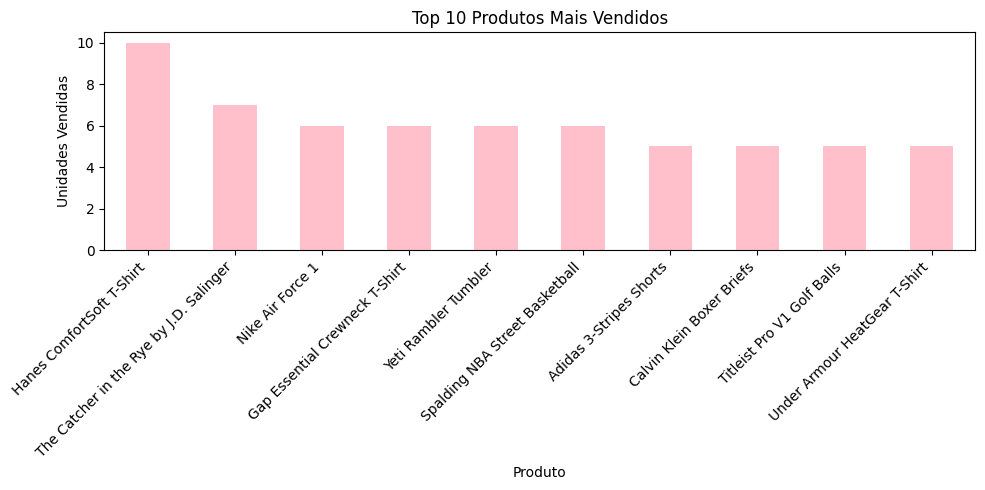

In [2]:


import pandas as pd
import matplotlib.pyplot as plt
#visualização
from IPython.display import display

#carregamento
df = pd.read_parquet(
    'C:/Users/samar/OneDrive/Documentos/ads-unipe/Analise de vendas de e-commerce/data/ecommerce_clean.parquet'
)
print("✅ Dataset carregado com sucesso!")


print("\n📘 Resumo do DataFrame:")
df.info()

print("\n📊 Estatísticas descritivas de colunas numéricas:")
display(df.describe())

print("\n🔍 Valores nulos por coluna:")
display(df.isnull().sum())


total_revenue = df['total_revenue'].sum()
total_transactions = df['transaction_id'].nunique()
total_units = df['units_sold'].sum()

print("\n📈 Indicadores gerais:")
print(f"- Receita total: ${total_revenue:,.2f}")
print(f"- Número de transações: {total_transactions}")
print(f"- Total de unidades vendidas: {total_units}")


top_products = (
    df.groupby('product_name')['units_sold']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("\n Top 10 produtos mais vendidos:")
display(top_products)

plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='pink')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
